In [54]:
import pandas as pd
df=pd.read_csv('/content/archive (1).zip')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [6]:
df.duplicated().sum()

0

In [ ]:
print(df.head())
print(df.dtypes)

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
price                int64
area                 int64
bedrooms             int64
bathrooms         

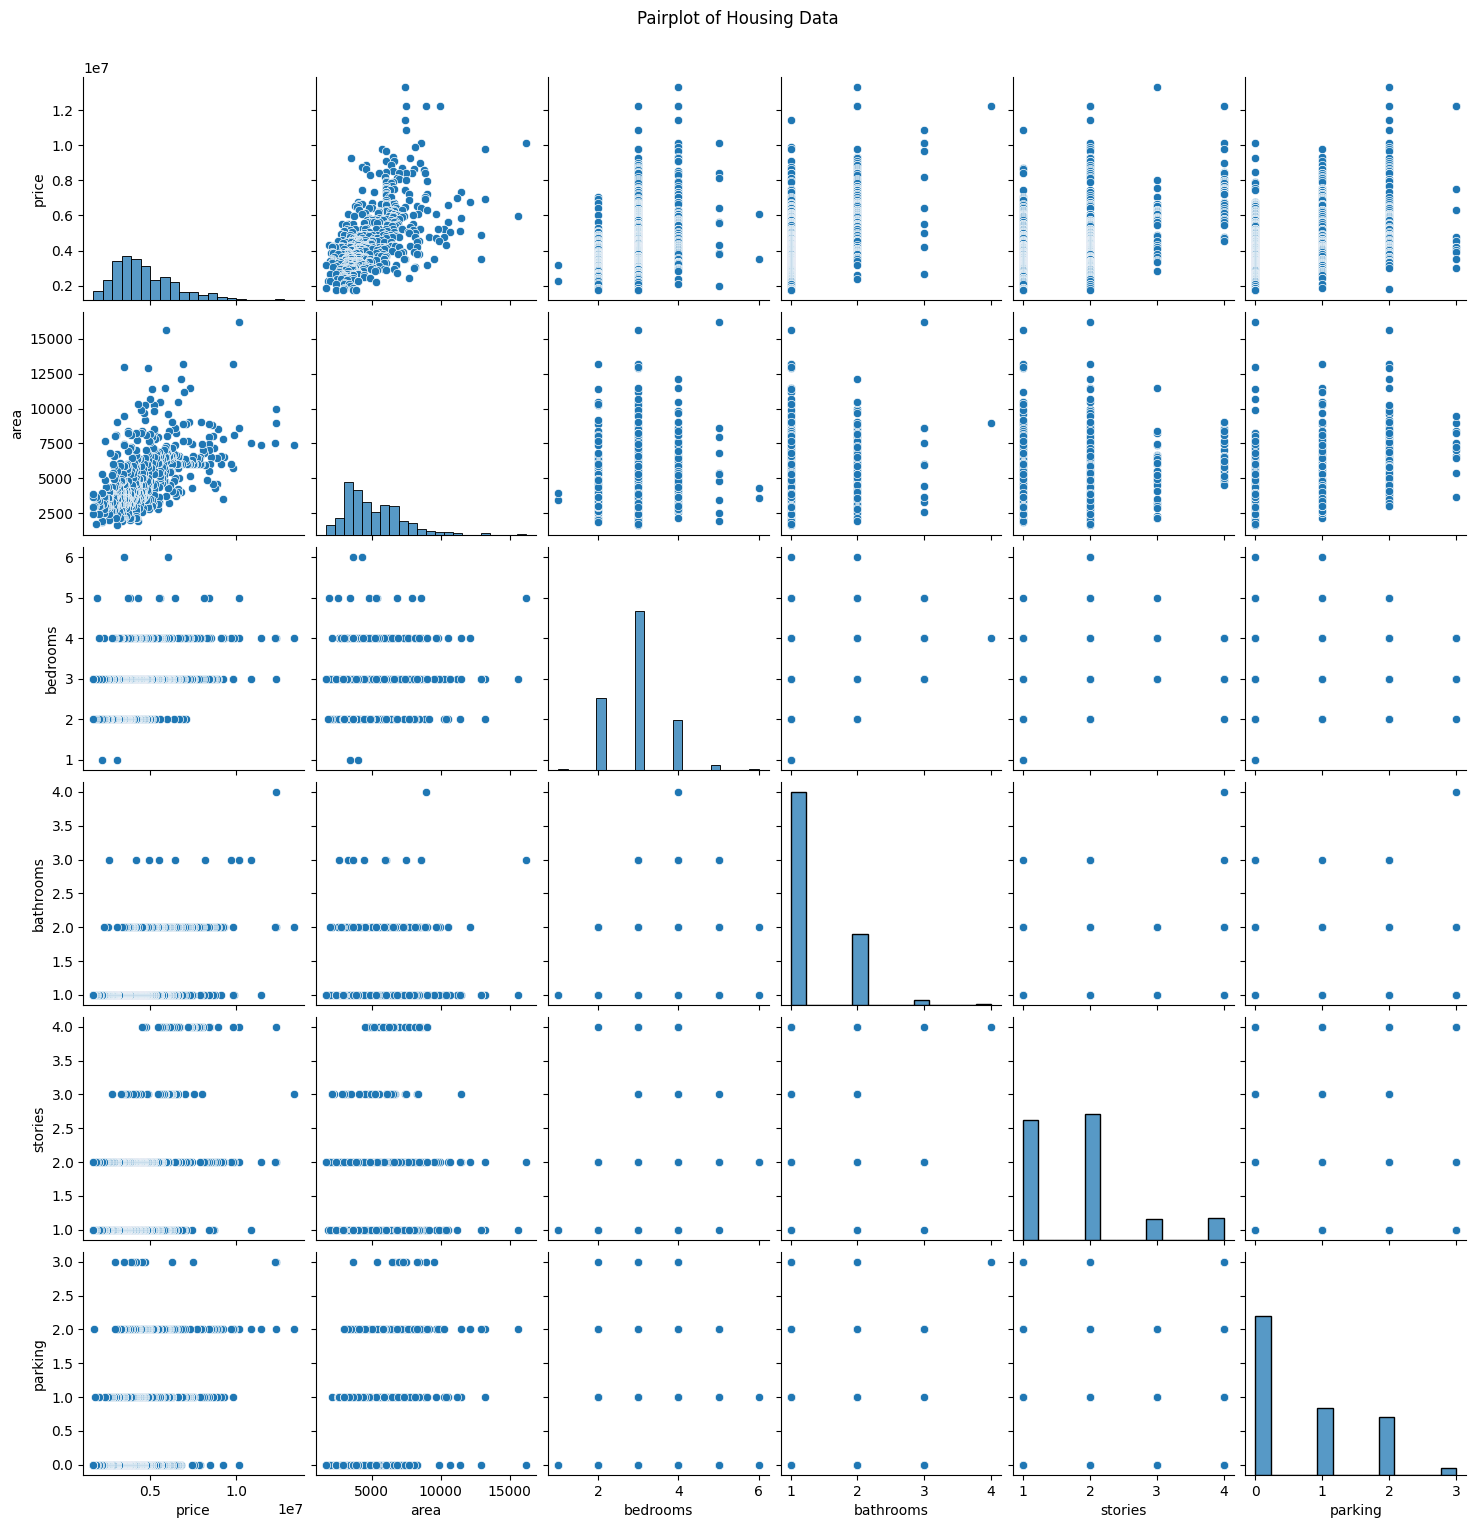

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

sns.pairplot(df[numerical_features])
plt.suptitle('Pairplot of Housing Data', y=1.02)
plt.show()

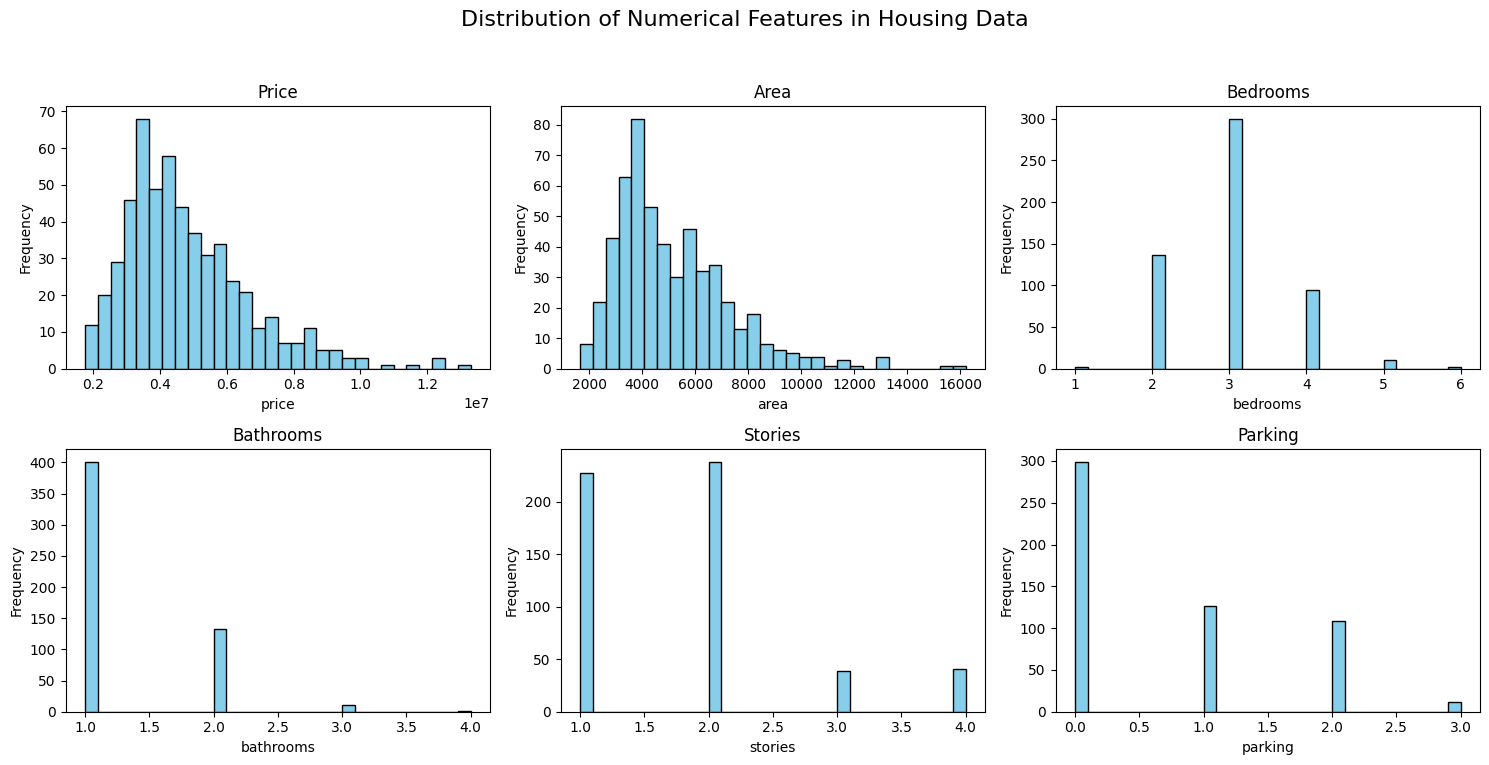

In [12]:
import matplotlib.pyplot as plt

numerical_features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Distribution of Numerical Features in Housing Data', fontsize=16)

axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    axes[i].hist(df[feature], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{feature.capitalize()}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

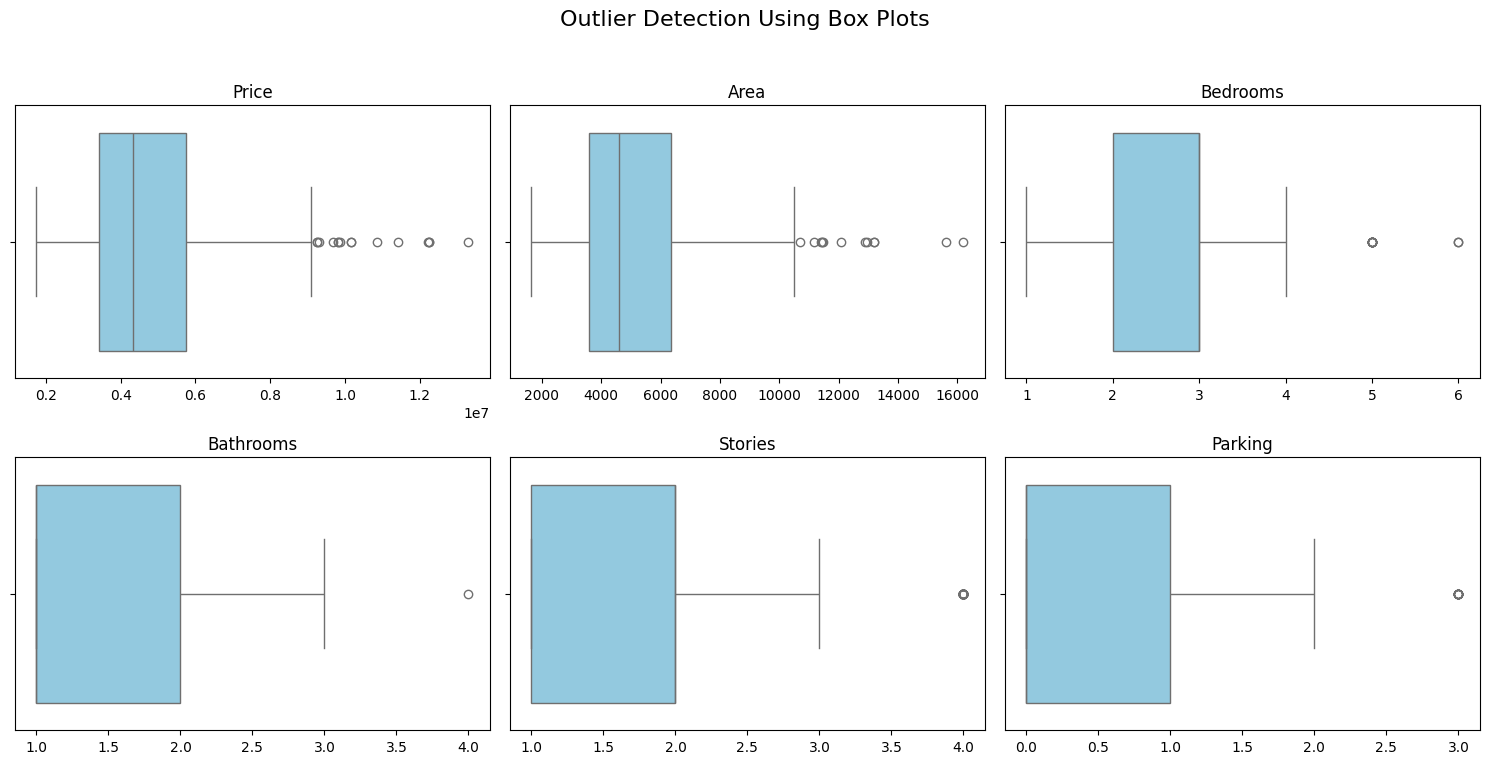

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['price', 'area', 'bedrooms',
                      'bathrooms', 'stories', 'parking']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Outlier Detection Using Box Plots', fontsize=16)

axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    sns.boxplot(data=df, x=feature, ax=axes[i], color='skyblue')
    axes[i].set_title(f'{feature.capitalize()}')
    axes[i].set_xlabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

columns_to_transform = ['mainroad', 'guestroom', 'basement',
                        'hotwaterheating', 'airconditioning', 'prefarea']

for column in columns_to_transform:
    df[column] = df[column].map({'yes': 1, 'no': 0})

label_encoder = LabelEncoder()

df['furnishingstatus_encoded'] = label_encoder.fit_transform(df['furnishingstatus'])

print(df.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

  furnishingstatus  furnishingstatus_encoded  
0        furnished                         0  
1        furnished                         0  
2   semi-furnishe

In [26]:
print(df[['furnishingstatus', 'furnishingstatus_encoded']])

    furnishingstatus  furnishingstatus_encoded
0          furnished                         0
1          furnished                         0
2     semi-furnished                         1
3          furnished                         0
4          furnished                         0
..               ...                       ...
540      unfurnished                         2
541   semi-furnished                         1
542      unfurnished                         2
543        furnished                         0
544      unfurnished                         2

[545 rows x 2 columns]


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

feature_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
                    'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
                    'furnishingstatus_encoded']
target_column = 'price'

X = df[feature_columns]
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", mean_squared_error(y_test, y_pred, squared=False))
print("R^2 Score:", r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 979679.6912959901
Mean Squared Error (MSE): 1771751116594.0352
Root Mean Squared Error (RMSE): 1331071.4167895108
R^2 Score: 0.6494754192267803


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


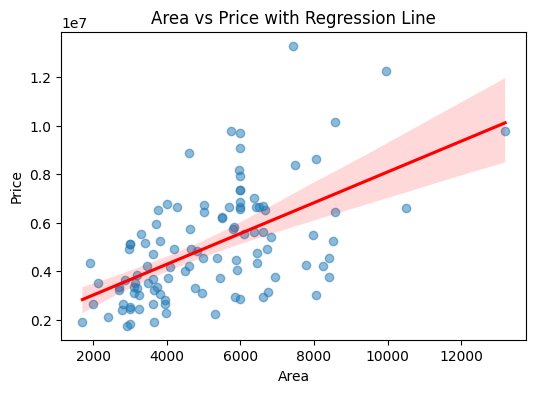

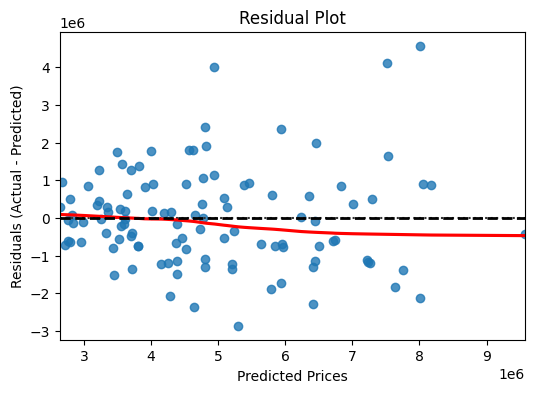

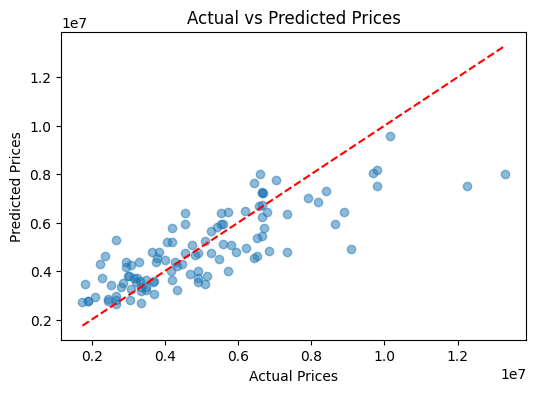

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.regplot(x=X_test['area'], y=y_test, line_kws={"color": "red"}, scatter_kws={"alpha": 0.5})
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs Price with Regression Line')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={"color": "red"})
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

feature_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
                   'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
                   'furnishingstatus_encoded']
target_column = 'price'

X = df[feature_columns]
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", mean_squared_error(y_test, y_pred, squared=False))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 1025289.6821100918
Mean Squared Error (MSE): 1963538216518.6526
Root Mean Squared Error (RMSE): 1401263.0789821919
R^2 Score: 0.6115321143409216


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


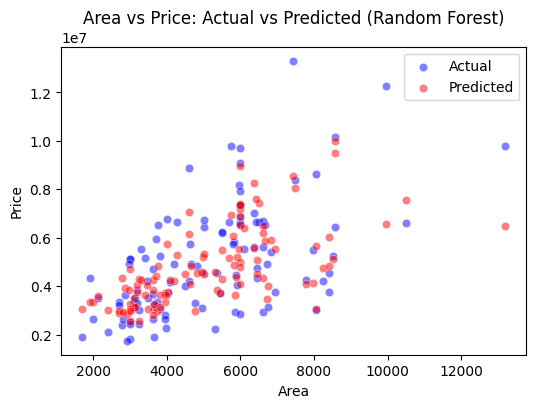

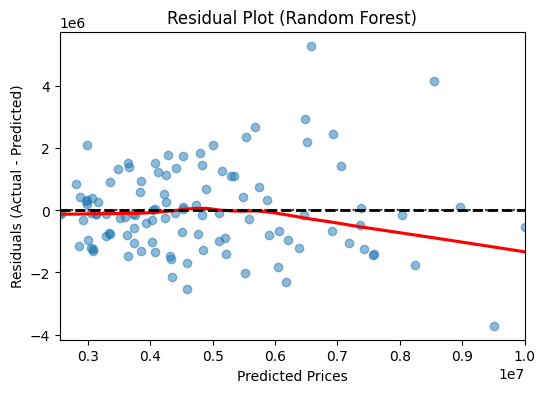

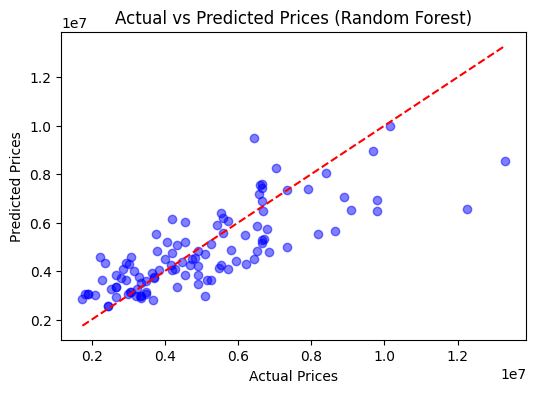

In [30]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_test['area'], y=y_test, color="blue", alpha=0.5, label='Actual')
sns.scatterplot(x=X_test['area'], y=y_pred, color="red", alpha=0.5, label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs Price: Actual vs Predicted (Random Forest)')
plt.legend()
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={"color": "red"},
              scatter_kws={"alpha": 0.5})
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (Random Forest)')
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Random Forest)')
plt.show()